# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
import seaborn as sns
from pandas.plotting import scatter_matrix

## Exploratory Data Analysis (EDA)
- This script conducts a comprehensive Exploratory Data Analysis (EDA) on the California Housing dataset.
- It includes:
  - Importing necessary libraries for data handling, visualization, and clustering.
  - Loading the dataset and performing initial data exploration including printing the shape, displaying the first few rows, and generating statistical summaries to understand data distribution and types.

## Data Visualization and Preprocessing:
  - Visualizing distribution histograms for all numerical features in the dataset to understand their skewness and kurtosis.
  - Checking for and imputing missing values specifically in the 'total_bedrooms' column using median imputation.
  - Visualizing categorical data distribution, particularly for the 'ocean_proximity' variable using bar charts and setting logarithmic scale for better readability.
  - Additional visualizations like histograms and boxplots for 'median_house_value' to assess value distribution and identify outliers.

## Data Transformation and Analysis:
  - Applying OneHotEncoder to convert the 'ocean_proximity' categorical variable into a numerical format suitable for modeling.
  - Concatenating the encoded categorical data back with the original dataset.
  - Scaling all features using StandardScaler to normalize data, making it suitable for further analysis like clustering or principal component analysis (PCA).
  - Calculating and visualizing the correlation matrix to identify potential multicollinearity among features.

## Advanced Visualizations:
  - Creating scatter plots to visually represent geographical distribution of features like population and house values. Overlaying this scatter plot on a map of California to provide contextual geographical insights.
  - Utilizing boxplots to compare distributions across different categories of 'ocean_proximity', linking house values with proximity to the ocean.

In [2]:
path = 'C:\\Users\\zcindemir\\Desktop\\Data Mining Project\\housing.csv'
housing = pd.read_csv(path)
print(housing.shape)

(20640, 10)


In [3]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

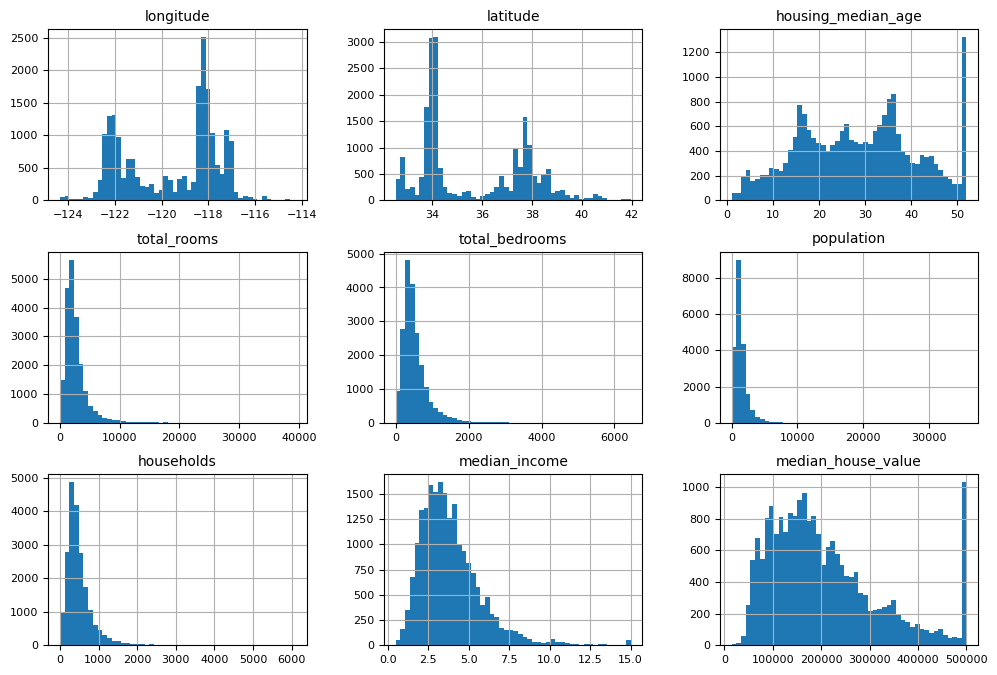

In [7]:
plt.rc('font', size=10)
plt.rc('axes', labelsize=10, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

housing.hist(bins=50, figsize=(12, 8))
plt.show()

In [8]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [9]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
housing['total_bedrooms'].fillna(housing['total_bedrooms'].median(), inplace=True)

In [11]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

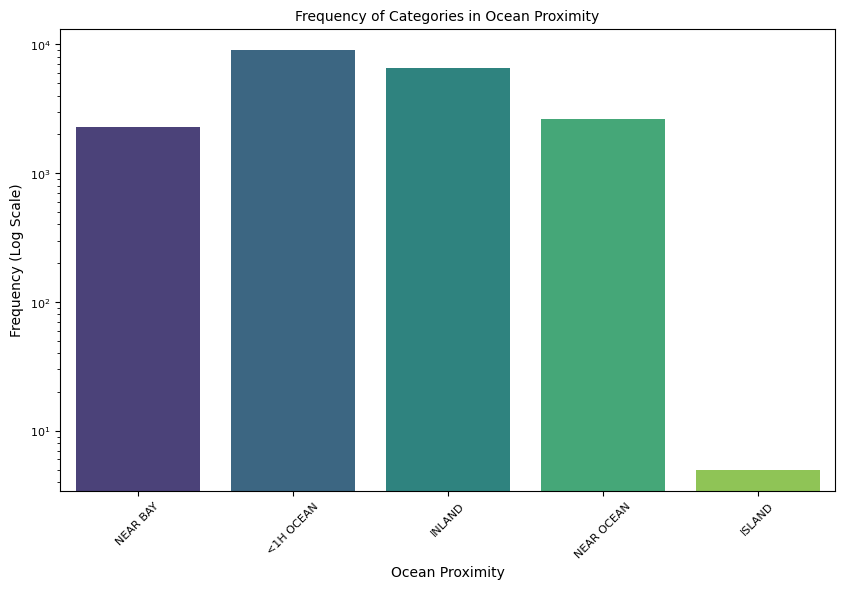

In [12]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='ocean_proximity', hue='ocean_proximity', data=housing, palette='viridis', legend=False)
plt.title('Frequency of Categories in Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Frequency (Log Scale)')
plt.xticks(rotation=45)

ax.set_yscale('log')

plt.show()

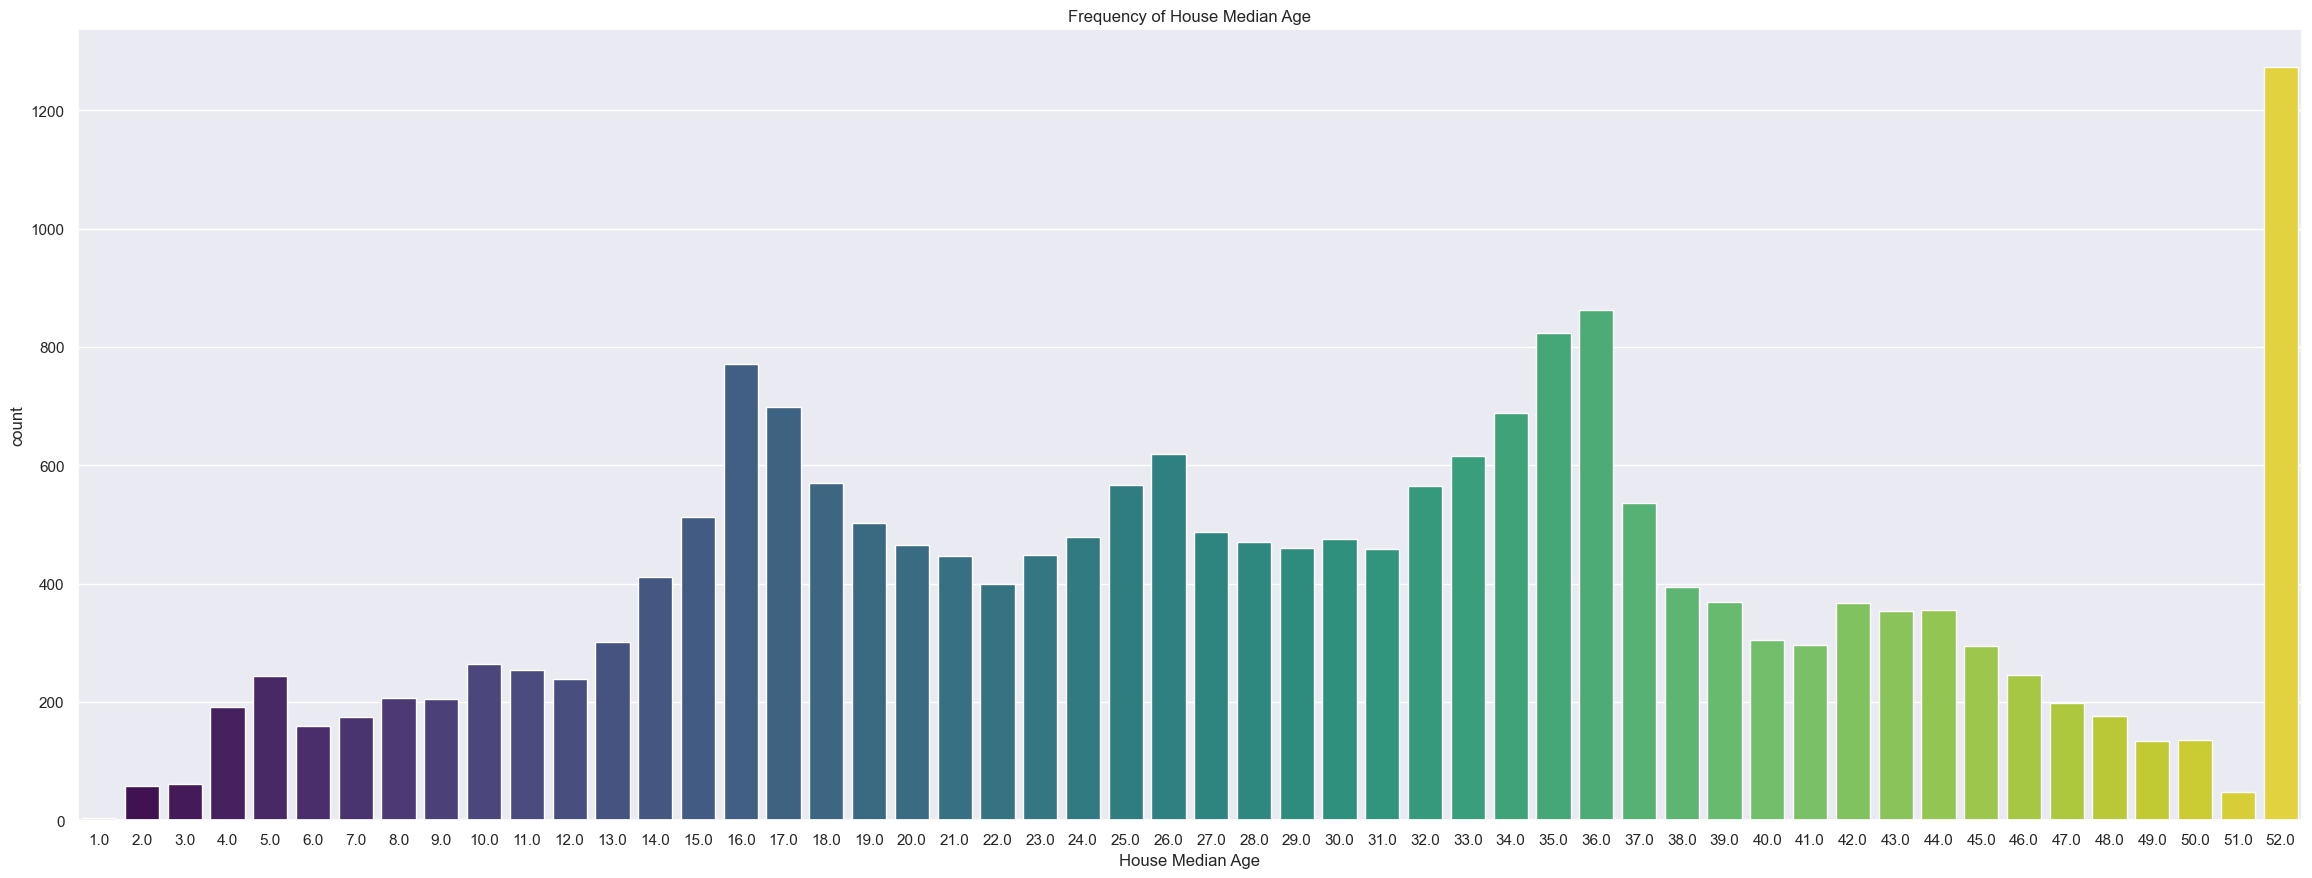

In [13]:
sns.set(rc={'figure.figsize':(28.7,10.27)})

ax = sns.countplot(data=housing, x="housing_median_age", hue="housing_median_age", palette="viridis", legend=False)
ax.set_title("Frequency of House Median Age")
ax.set_xlabel("House Median Age")
plt.show()

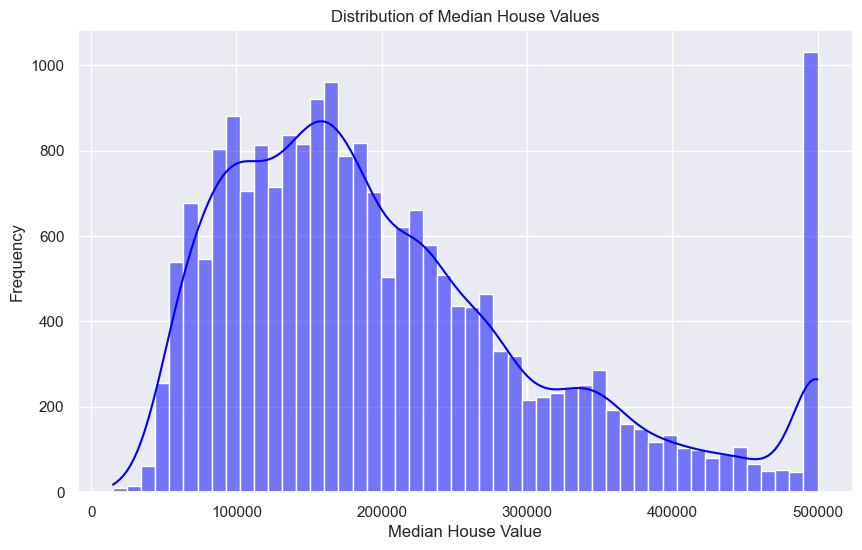

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(housing['median_house_value'], bins=50, kde=True, color='blue')
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

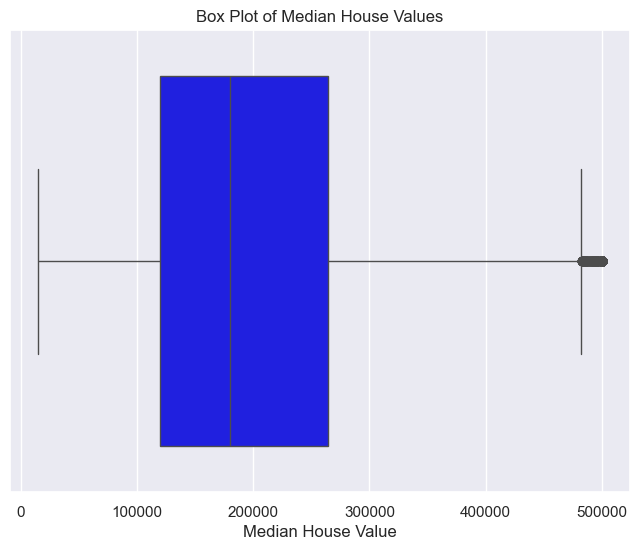

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=housing['median_house_value'], color='blue')
plt.title('Box Plot of Median House Values')
plt.xlabel('Median House Value')
plt.show()

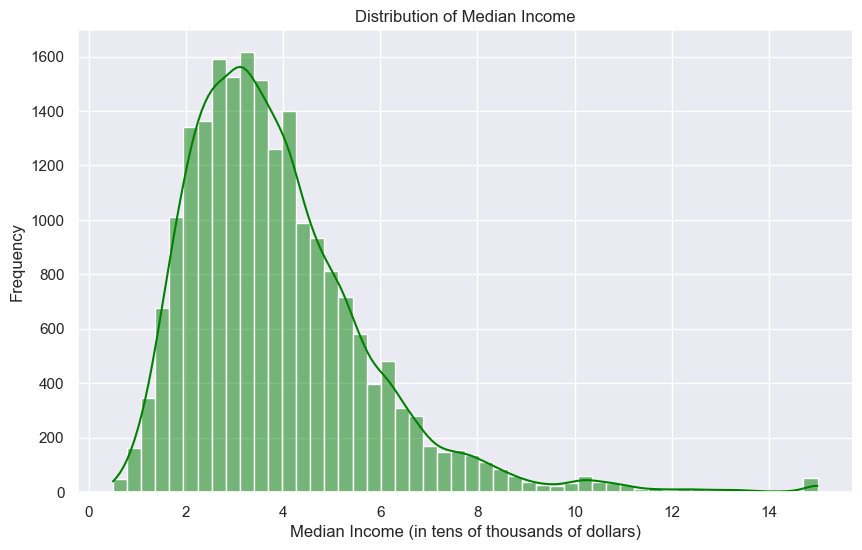

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(housing['median_income'], bins=50, kde=True, color='green')
plt.title('Distribution of Median Income')
plt.xlabel('Median Income (in tens of thousands of dollars)')
plt.ylabel('Frequency')
plt.show()

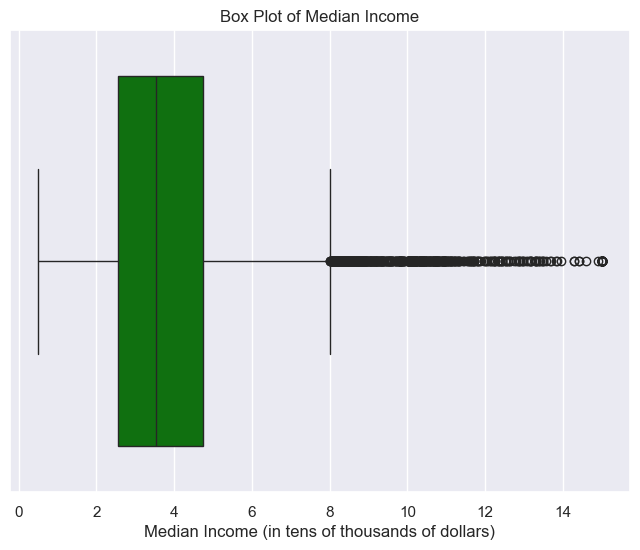

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=housing['median_income'], color='green')
plt.title('Box Plot of Median Income')
plt.xlabel('Median Income (in tens of thousands of dollars)')
plt.show()

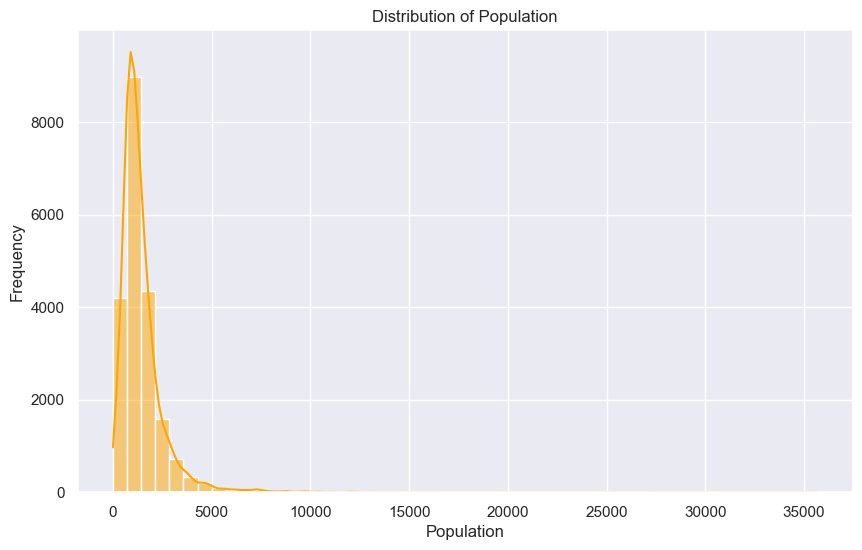

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(housing['population'], bins=50, kde=True, color='orange')
plt.title('Distribution of Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

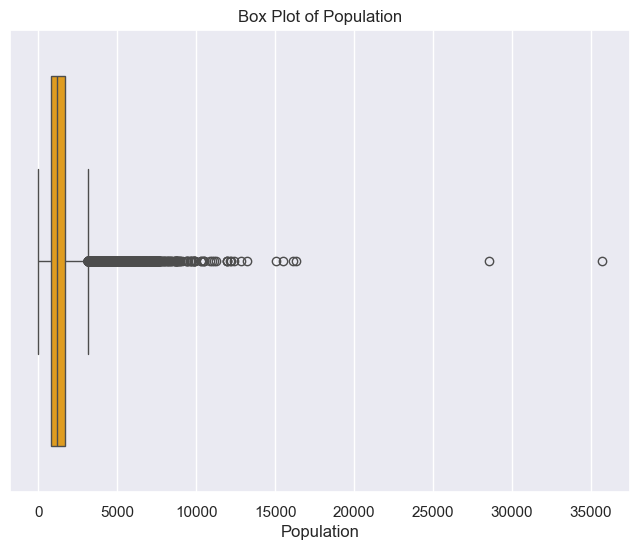

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=housing['population'], color='orange')
plt.title('Box Plot of Population')
plt.xlabel('Population')
plt.show()

<Figure size 2500x1500 with 0 Axes>

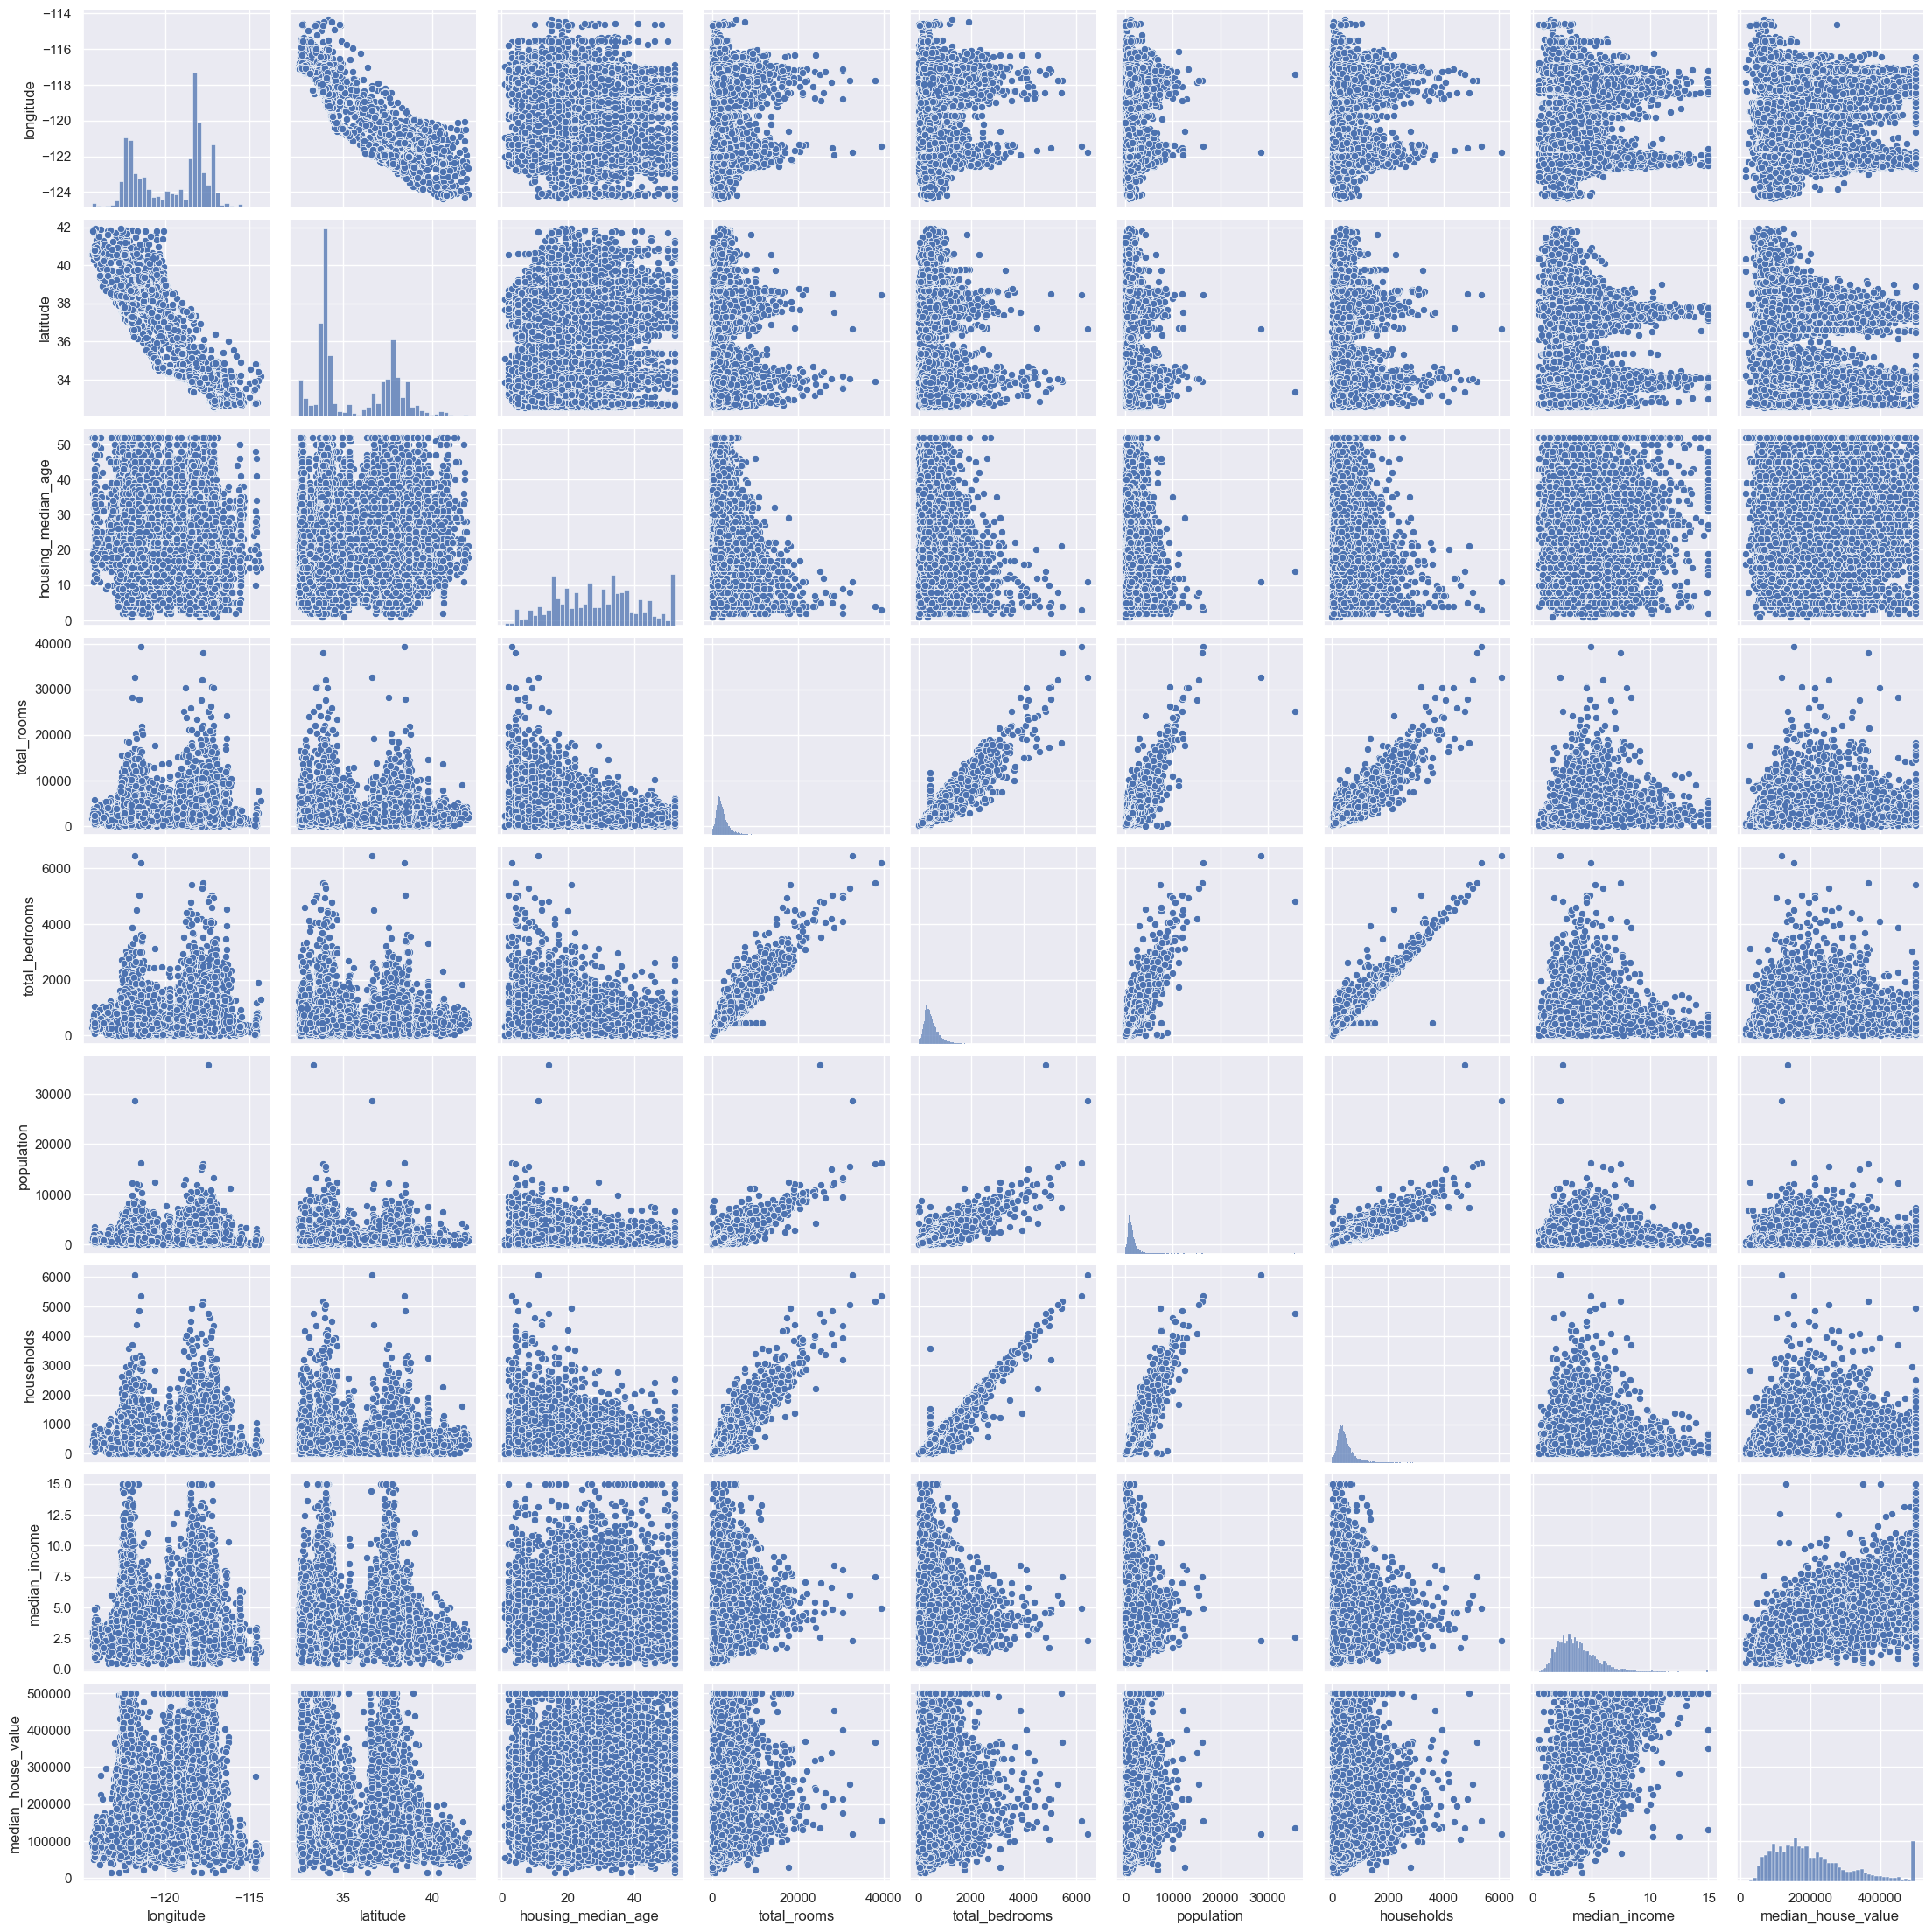

In [20]:
plt.figure(figsize=(25,15))

sns.pairplot(housing)

plt.show()

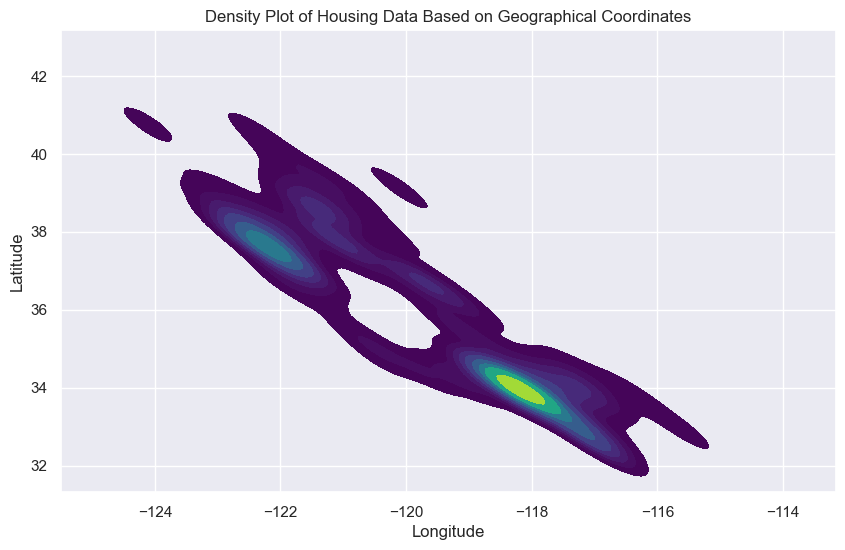

In [21]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x=housing['longitude'], y=housing['latitude'], fill=True, cmap="viridis")
plt.title('Density Plot of Housing Data Based on Geographical Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

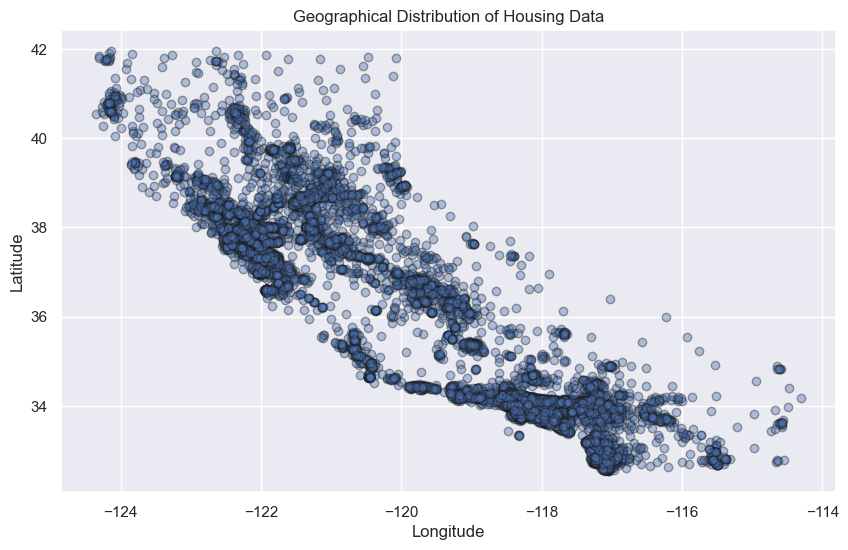

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(housing['longitude'], housing['latitude'], alpha=0.4, edgecolor='k')
plt.title('Geographical Distribution of Housing Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

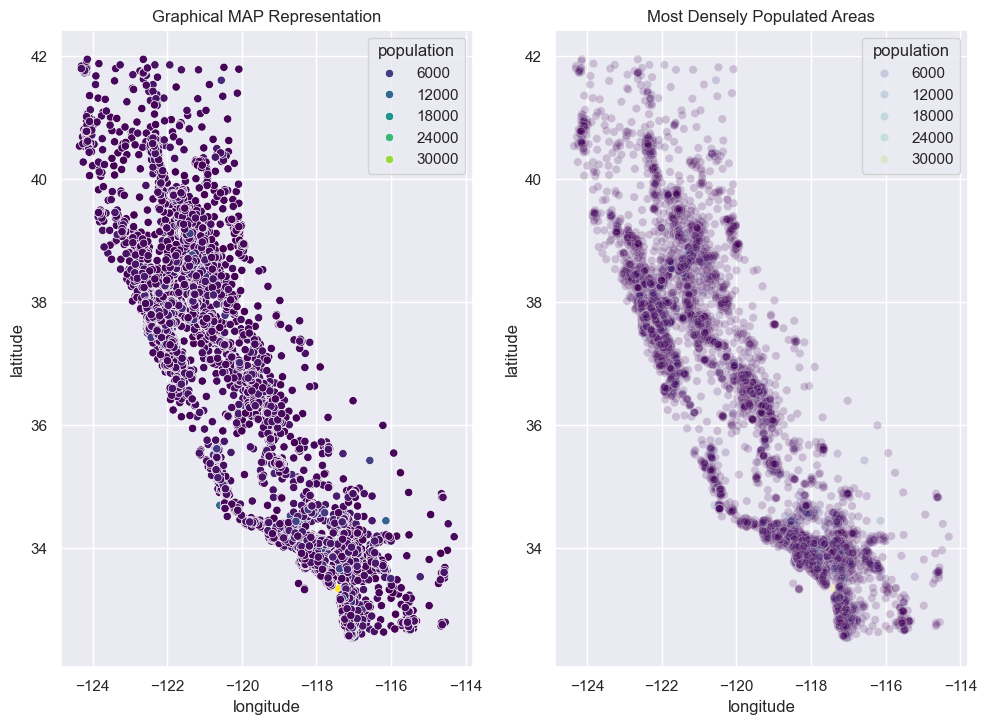

In [23]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, axes = plt.subplots(1, 2)

sns.scatterplot(data=housing, x="longitude", y="latitude", hue="population", ax=axes[0],  palette="viridis").set(
    title = "Graphical MAP Representation"
)
sns.scatterplot(data=housing, x="longitude", y="latitude", hue="population", alpha=0.2, ax=axes[1],  palette="viridis").set(
    title = "Most Densely Populated Areas"
)

plt.show()

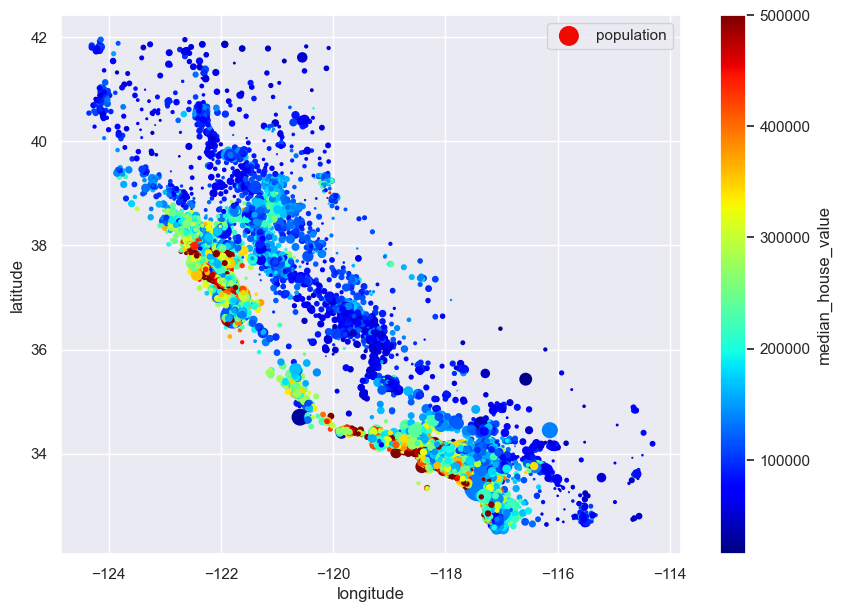

In [24]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

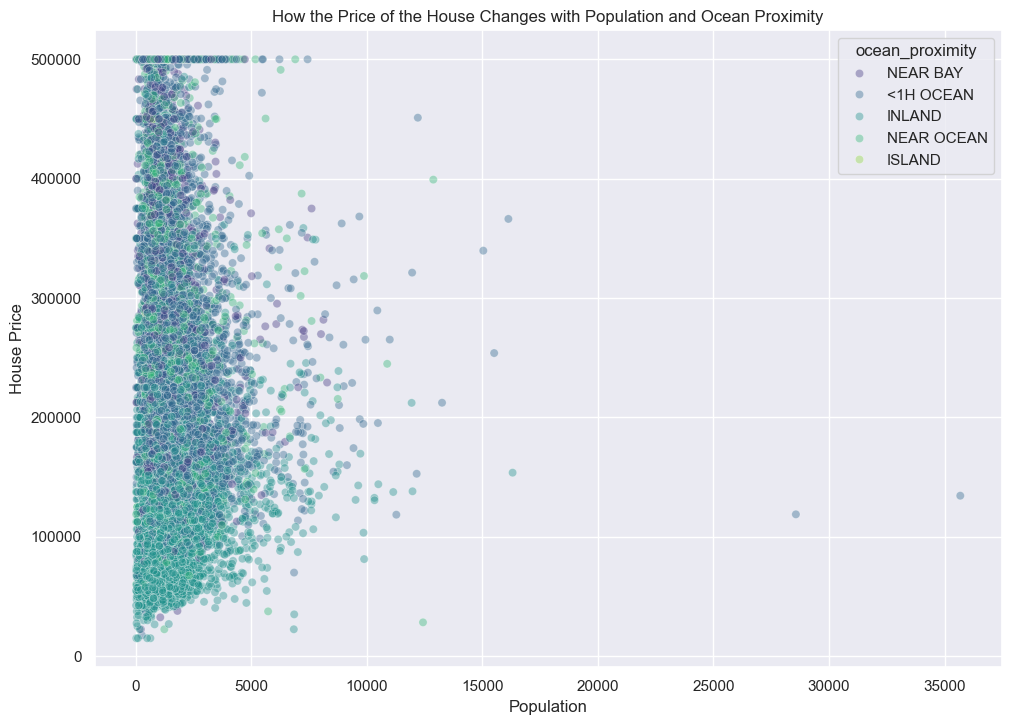

In [25]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.scatterplot(data=housing, x="population", y="median_house_value", hue="ocean_proximity", palette="viridis", alpha=0.4).set(
    title = "How the Price of the House Changes with Population and Ocean Proximity",
    xlabel = "Population",
    ylabel = "House Price"
)

plt.show()

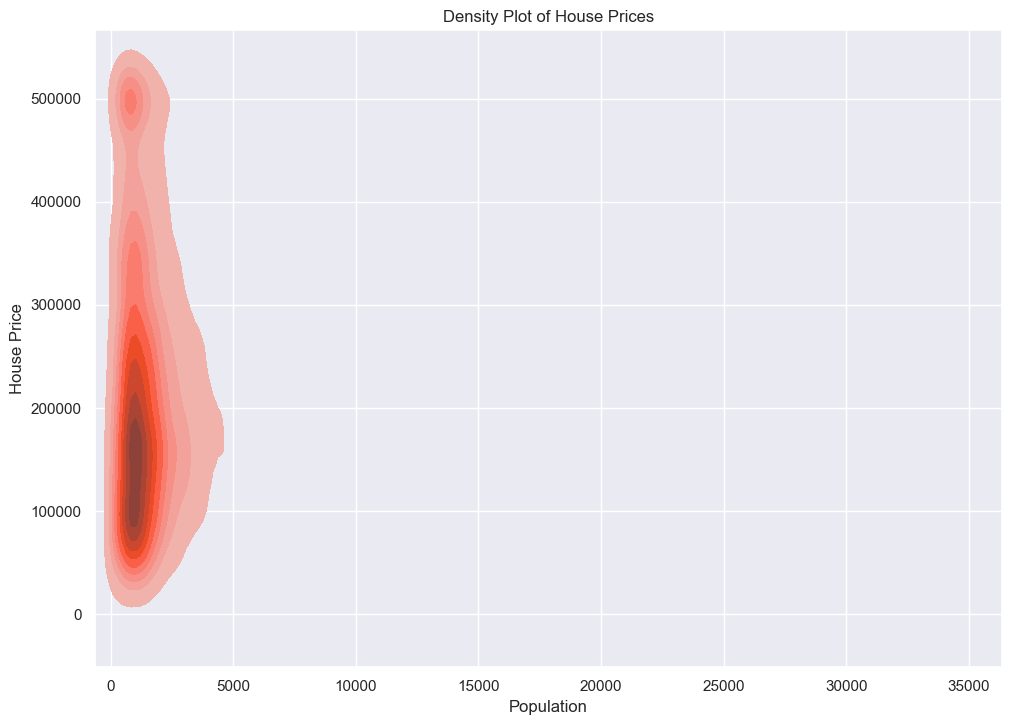

In [26]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.kdeplot(x='population', y='median_house_value', data=housing, fill="True", color="salmon").set(
    title = "Density Plot of House Prices",
    xlabel = "Population",
    ylabel = "House Price"
)

plt.show()

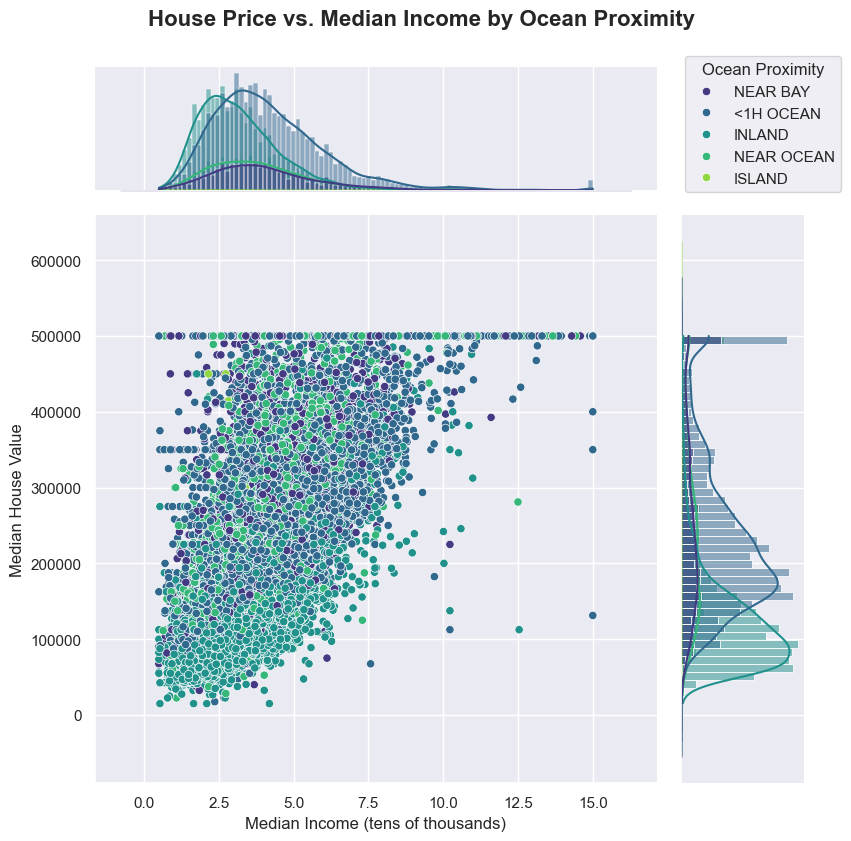

In [27]:
m = sns.jointplot(data=housing, x="median_income", y="median_house_value", hue="ocean_proximity", palette="viridis", height=8, ratio=4)
m.plot_marginals(sns.histplot, kde=True)

m.fig.suptitle('House Price vs. Median Income by Ocean Proximity', fontsize=16, fontweight='bold', y=1.05)
m.set_axis_labels('Median Income (tens of thousands)', 'Median House Value', fontsize=12)

plt.legend(title='Ocean Proximity', bbox_to_anchor=(1.05, 1.28), loc=2, borderaxespad=0.)
plt.show()

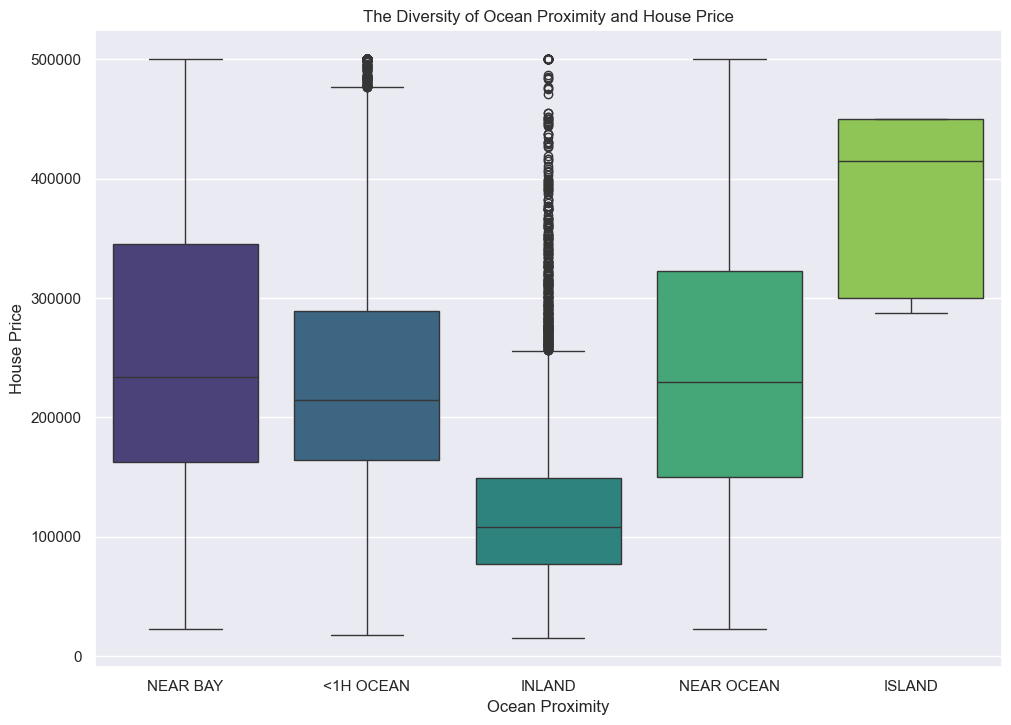

In [28]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.boxplot(x='ocean_proximity', y='median_house_value', hue='ocean_proximity',
                 data=housing, palette="viridis", legend=False)
ax.set(title="The Diversity of Ocean Proximity and House Price",
       xlabel="Ocean Proximity", ylabel="House Price")

plt.show()

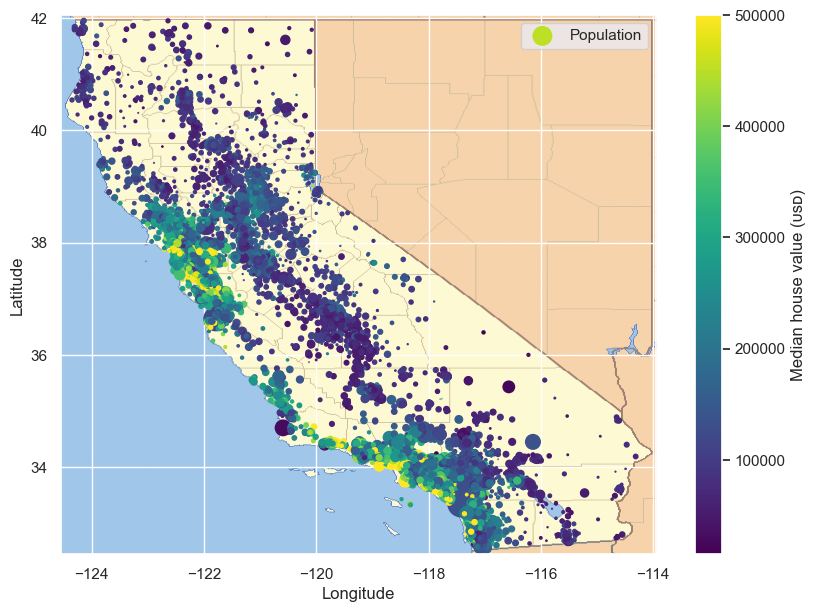

In [29]:
filename = "california.png"

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", cmap="viridis", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread(filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

plt.show()

In [30]:
encoder = OneHotEncoder()
ocean_proximity_encoded = encoder.fit_transform(housing[['ocean_proximity']]).toarray()
feature_names = encoder.get_feature_names_out(['ocean_proximity'])
ocean_proximity_df = pd.DataFrame(ocean_proximity_encoded, columns=feature_names)
ocean_proximity_df

ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                            0.0                     0.0   
1                            0.0                     0.0   
2                            0.0                     0.0   
3                            0.0                     0.0   
4                            0.0                     0.0   
...                          ...                     ...   
20635                        0.0                     1.0   
20636                        0.0                     1.0   
20637                        0.0                     1.0   
20638                        0.0                     1.0   
20639                        0.0                     1.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                         0.0                       1.0   
1                         0.0                       1.0   
2                         0.0                       1.0   
3                         0.0                       1.0   
4                         0.0                       1.0   
...                       ...                       ...   
20635                     0.0                       0.0   
20636                     0.0                       0.0   
20637                     0.0                       0.0   
20638                     0.0                       0.0   
20639                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  
...                           ...  
20635                         0.0  
20636                         0.0  
20637                         0.0  
20638                         0.0  
20639                         0.0  

[20640 rows x 5 columns]

In [31]:
housing_encoded = pd.concat([housing.drop('ocean_proximity', axis=1), ocean_proximity_df], axis=1)
housing_encoded

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                            0.0                     0.0   
1                            0.0                     0.0   
2                            0.0                     0.0   
3                            0.0                     0.0   
4                            0.0                     0.0   
...                          ...                     ...   
20635                        0.0                     1.0   
20636                        0.0                     1.0   
20637                        0.0                     1.0   
20638                        0.0                     1.0   
20639                        0.0                     1.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                         0.0                       1.0   
1                         0.0                       1.0   
2                         0.0                       1.0   
3                         0.0                       1.0   
4                         0.0                       1.0   
...                       ...                       ...   
20635                     0.0                       0.0   
20636                     0.0                       0.0   
20637                     0.0                       0.0   
20638                     0.0                       0.0   
20639                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  
...                           ...  
20635                         0.0  
20636                         0.0  
20637                         0.0  
20638                         0.0  
20639                         0.0  

[20640 rows x 14 columns]

In [32]:
scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_encoded)
housing_scaled

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.32284391,  1.04318455, -0.60701891, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.01556621,
         2.83074203, -0.38446649],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.01556621,
        -0.35326426, -0.38446649]])

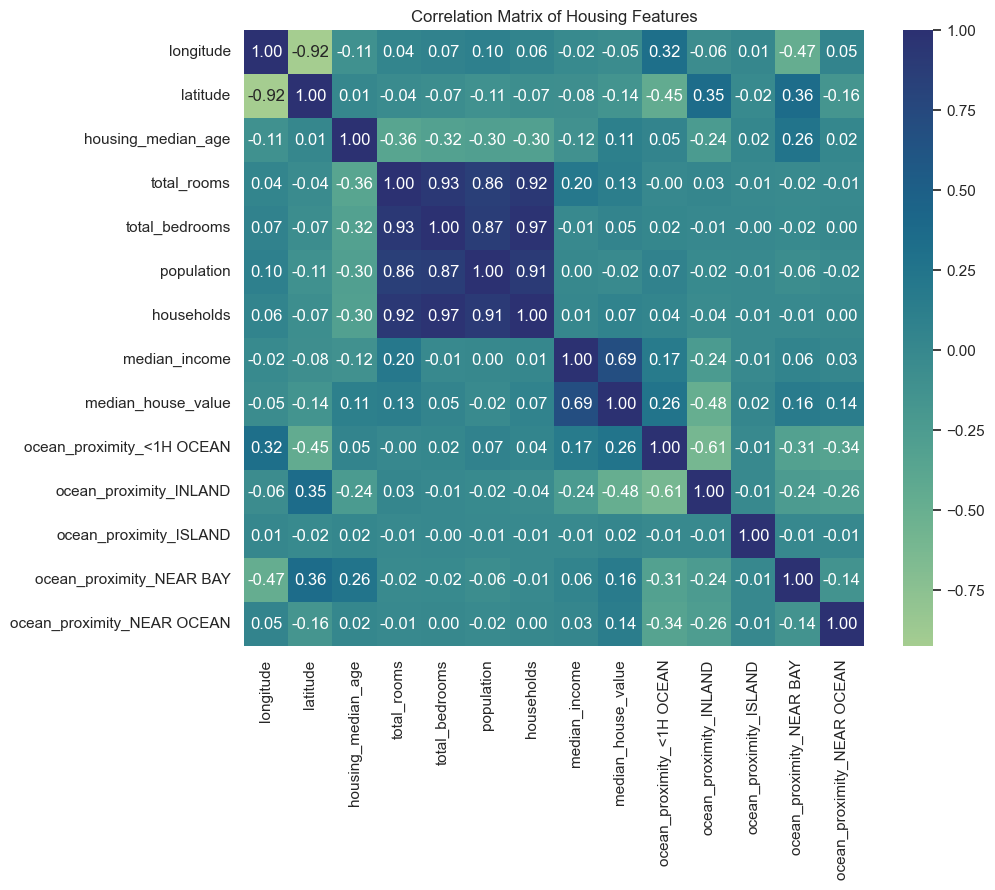

In [33]:
housing_df = pd.DataFrame(housing_scaled, columns=housing_encoded.columns)

correlation_matrix = housing_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='crest', cbar=True)
plt.title('Correlation Matrix of Housing Features')
plt.show()